In [2]:
pip install pytimetk


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 759.7/759.7 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983

In [3]:
import pandas as pd
import numpy as np
import pytimetk as tk


In [4]:
!pip install pymc-marketing


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.6/484.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.5 MB/s eta 0:00:00
  Attempting uninstall: pytensor
    Found existing installation: pytensor 2.18.6
    Uninstalling pytensor-2.18.6:
      Successfully uninstalled pytensor-2.18.6
  Attempting uninstall: pymc
    Found existing installation: pymc 5.10.4
    Uninstalling pymc-5.10.4:
      Successfully uninstalled pymc-5.10.4


In [5]:
from pymc_marketing.mmm.delayed_saturated_mmm import DelayedSaturatedMMM

In [6]:
import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
data = pd.read_csv("/content/MMM_test_data.csv",  parse_dates= ["start_of_week"] )

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   start_of_week    104 non-null    datetime64[ns]
 1   revenue          104 non-null    float64       
 2   spend_channel_1  104 non-null    float64       
 3   spend_channel_2  104 non-null    float64       
 4   spend_channel_3  104 non-null    float64       
 5   spend_channel_4  104 non-null    float64       
 6   spend_channel_5  104 non-null    float64       
 7   spend_channel_6  104 non-null    float64       
 8   spend_channel_7  104 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 7.4 KB


In [9]:
data.glimpse()

<class 'pandas.core.frame.DataFrame'>: 104 rows of 9 columns
start_of_week:    datetime64[ns]    [Timestamp('2020-08-30 00:00:00'), T ...
revenue:          float64           [157906.75, 186425.68, 161607.39, 18 ...
spend_channel_1:  float64           [2625.48, 2634.01, 2087.08, 1690.7,  ...
spend_channel_2:  float64           [262.71, 108.66, 110.32, 52.79, 80.5 ...
spend_channel_3:  float64           [12954.12, 8760.28, 7155.42, 15185.2 ...
spend_channel_4:  float64           [3609.63, 4560.6, 4362.96, 3883.41,  ...
spend_channel_5:  float64           [12955.29, 12747.7, 15015.41, 15521. ...
spend_channel_6:  float64           [12659.12, 12338.18, 10811.15, 12890 ...
spend_channel_7:  float64           [19379.79, 22473.45, 22596.05, 24728 ...


In [10]:
df = data.copy()

In [11]:
df \
    .melt(id_vars= ["start_of_week"],
          value_vars=['spend_channel_1',
          'spend_channel_2',
          'spend_channel_3',
          'spend_channel_4',
          'spend_channel_5',
          'spend_channel_6',
          'spend_channel_7']) \
    .groupby("variable") \
    .plot_timeseries(
          "start_of_week" , "value" ,
          color_column= "variable",
          facet_ncol = 2,
          width = 600 ,
          height = 800 ,
          legend_show = False
    )

In [12]:
df.columns

Index(['start_of_week', 'revenue', 'spend_channel_1', 'spend_channel_2',
       'spend_channel_3', 'spend_channel_4', 'spend_channel_5',
       'spend_channel_6', 'spend_channel_7'],
      dtype='object')

In [68]:
total_spend = df[[ 'spend_channel_1', 'spend_channel_2',
       'spend_channel_3', 'spend_channel_4', 'spend_channel_5',
       'spend_channel_6', 'spend_channel_7']].sum(axis = 0).sum()
total_spend

7212632.79

In [69]:
total_revenue = df["revenue"].sum()
total_revenue

14194979.830000002

In [70]:
total_revenue / total_spend

1.9680718876580992

In [16]:
median_spend = df[[ 'spend_channel_1', 'spend_channel_2',
       'spend_channel_3', 'spend_channel_4', 'spend_channel_5',
       'spend_channel_6', 'spend_channel_7']].median()
median_spend

spend_channel_1      856.870
spend_channel_2      202.020
spend_channel_3    17929.450
spend_channel_4     6194.400
spend_channel_5     6879.270
spend_channel_6     2423.095
spend_channel_7    24248.640
dtype: float64

In [17]:
mean_spend = df[[ 'spend_channel_1', 'spend_channel_2',
       'spend_channel_3', 'spend_channel_4', 'spend_channel_5',
       'spend_channel_6', 'spend_channel_7']].mean()
mean_spend

spend_channel_1     1245.604808
spend_channel_2      343.640962
spend_channel_3    19507.177981
spend_channel_4     6915.136731
spend_channel_5     8575.611442
spend_channel_6     5063.699038
spend_channel_7    27701.367404
dtype: float64

In [18]:
df[[ 'spend_channel_1', 'spend_channel_2',
       'spend_channel_3', 'spend_channel_4', 'spend_channel_5',
       'spend_channel_6', 'spend_channel_7']] \
       .describe() \
       .apply(lambda x: x.apply(lambda y: "{: ,.0f}".format(y)))

,spend_channel_1,spend_channel_2,spend_channel_3,spend_channel_4,spend_channel_5,spend_channel_6,spend_channel_7
count,104,104,104,104,104,104,104
mean,"1,246",344,"19,507","6,915","8,576","5,064","27,701"
std,"1,388",333,"8,715","3,123","6,957","6,689","12,176"
min,0,4,"5,938","3,602",747,0,"9,391"
25%,334,120,"13,879","5,114","2,902",0,"19,798"
50%,857,202,"17,929","6,194","6,879","2,423","24,249"
75%,"1,658",553,"22,252","7,471","14,368","8,702","33,853"
max,"8,514","1,606","49,689","22,630","33,010","33,693","77,488"


In [19]:
mean_spend.sum()

69352.23836538462

In [20]:
df.features = df \
      .assign (
          year = lambda x : x["start_of_week"].dt.year,
          month = lambda x : x["start_of_week"].dt.month,
          dayofyear = lambda x : x["start_of_week"].dt.dayofyear,

      )\
      .assign(
          trend = lambda x : df.index,
      )
df.features

,start_of_week,revenue,spend_channel_1,spend_channel_2,spend_channel_3,spend_channel_4,spend_channel_5,spend_channel_6,spend_channel_7,year,month,dayofyear,trend
0,2020-08-30,157906.75,2625.48,262.71,12954.12,3609.63,12955.29,12659.12,19379.79,2020,8,243,0
1,2020-06-09,186425.68,2634.01,108.66,8760.28,4560.60,12747.70,12338.18,22473.45,2020,6,161,1
2,2020-09-13,161607.39,2087.08,110.32,7155.42,4362.96,15015.41,10811.15,22596.05,2020,9,257,2
3,2020-09-20,180089.13,1690.70,52.79,15185.22,3883.41,15521.41,12890.22,24728.73,2020,9,264,3
4,2020-09-27,217793.98,1547.30,80.56,18524.05,4043.09,15793.74,12642.55,26515.48,2020,9,271,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2022-07-24,72021.50,0.00,1118.78,22305.10,4566.01,2987.70,0.00,19916.88,2022,7,205,99
100,2022-07-31,90786.21,0.00,122.16,15812.65,4795.51,3293.40,0.00,22687.98,2022,7,212,100
101,2022-07-08,105929.40,0.00,754.09,12166.85,4961.12,4057.03,0.00,30142.64,2022,7,189,101
102,2022-08-14,90506.31,0.00,1043.22,10856.58,4431.13,3086.81,0.00,28622.78,2022,8,226,102


In [21]:
df.features = df.features[['start_of_week' ,'revenue', 'spend_channel_1', 'spend_channel_2',
       'spend_channel_3', 'spend_channel_4', 'spend_channel_5',
       'spend_channel_6', 'spend_channel_7', 'trend','year','month','dayofyear' ]]

In [22]:
df.features.glimpse()

<class 'pandas.core.frame.DataFrame'>: 104 rows of 13 columns
start_of_week:    datetime64[ns]    [Timestamp('2020-08-30 00:00:00'), T ...
revenue:          float64           [157906.75, 186425.68, 161607.39, 18 ...
spend_channel_1:  float64           [2625.48, 2634.01, 2087.08, 1690.7,  ...
spend_channel_2:  float64           [262.71, 108.66, 110.32, 52.79, 80.5 ...
spend_channel_3:  float64           [12954.12, 8760.28, 7155.42, 15185.2 ...
spend_channel_4:  float64           [3609.63, 4560.6, 4362.96, 3883.41,  ...
spend_channel_5:  float64           [12955.29, 12747.7, 15015.41, 15521. ...
spend_channel_6:  float64           [12659.12, 12338.18, 10811.15, 12890 ...
spend_channel_7:  float64           [19379.79, 22473.45, 22596.05, 24728 ...
trend:            int64             [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1 ...
year:             int32             [2020, 2020, 2020, 2020, 2020, 2020, ...
month:            int32             [8, 6, 9, 9, 9, 4, 11, 10, 10, 1, 8, ...
dayofyear:    

In [23]:
total_spend_per_channel = df.features[[ 'spend_channel_1', 'spend_channel_2',
       'spend_channel_3', 'spend_channel_4', 'spend_channel_5',
       'spend_channel_6', 'spend_channel_7' ]].sum(axis=0)

In [24]:
spend_proportion = total_spend_per_channel / total_spend_per_channel.sum()

In [25]:
HALFNORMAL_SCALE = 1/ np.sqrt(1-2/np.pi)
n_channels = 5


In [26]:
X = df.features.drop("revenue", axis = 1)
y = df.features["revenue"]


In [27]:
dummy_model = DelayedSaturatedMMM(
    date_column = "start_of_week",
    channel_columns = ['spend_channel_1', 'spend_channel_2',
       'spend_channel_3', 'spend_channel_4', 'spend_channel_5',
       'spend_channel_6', 'spend_channel_7'],
    control_columns= [
        "trend",
        "year" ,
        "month",
    ],
    adstock_max_lag=8,
)

dummy_model.default_model_config


{'intercept': {'dist': 'Normal', 'kwargs': {'mu': 0, 'sigma': 2}},
 'beta_channel': {'dist': 'HalfNormal', 'kwargs': {'sigma': 2}},
 'alpha': {'dist': 'Beta', 'kwargs': {'alpha': 1, 'beta': 3}},
 'lam': {'dist': 'Gamma', 'kwargs': {'alpha': 3, 'beta': 1}},
 'likelihood': {'dist': 'Normal',
  'kwargs': {'sigma': {'dist': 'HalfNormal', 'kwargs': {'sigma': 2}}}},
 'gamma_control': {'dist': 'Normal', 'kwargs': {'mu': 0, 'sigma': 2}},
 'gamma_fourier': {'dist': 'Laplace', 'kwargs': {'mu': 0, 'b': 1}},
 'intercept_tvp_kwargs': {'m': 200,
  'L': None,
  'eta_lam': 1,
  'ls_mu': None,
  'ls_sigma': 10,
  'cov_func': None}}

In [28]:
my_model_config ={
    "intercept" : {
        "dist" : "Normal",
        "kwargs" : {
            "mu" : 0,
            "sigma" :2
        }
    },
    "beta_channel": {
        "dist" :"HalfNormal",
        "kwargs" : {
            "sigma": 2
        }
    },
    "likelihood": {
        "dist" : "Normal",
        "kwargs": {
            "sigma" : {
                "dist" : "HalfNormal",
                "kwargs" : {
                        "sigma" : 2

                }
            }
        }
    },
    "alpha" : {
        "dist" : "Beta",
        "kwargs" : {"alpha" : 1 , "beta" : 3}
    },
    "lam" : {
        "dist" : "Beta",
        "kwargs" : {"alpha" :3 ,"beta" : 1}

    },
    "gamma_control" : {
        "dist" : "Normal",
        "kwargs" : {"mu" :0 ,"sigma" : 2}

    },
    "gamma_fourier" : {
        "dist" : "Laplace",
        "kwargs" : {"mu" :0 ,"b" : 1}

    },
}
my_sampler_config = {
        "progressbar": True,
        "cores" : 1,
 }


In [29]:
mmm = DelayedSaturatedMMM(
    model_config= my_model_config,
    sampler_config= my_sampler_config,
    date_column= "start_of_week",
    channel_columns=['spend_channel_1', 'spend_channel_2',
       'spend_channel_3', 'spend_channel_4', 'spend_channel_5',
       'spend_channel_6', 'spend_channel_7'],
    control_columns= [
        "trend",
        "year" ,
        "month",
    ],
    adstock_max_lag=8,
    yearly_seasonality=2,
)

mmm.model_config


mmm.default_model_config



{'intercept': {'dist': 'Normal', 'kwargs': {'mu': 0, 'sigma': 2}},
 'beta_channel': {'dist': 'HalfNormal', 'kwargs': {'sigma': 2}},
 'alpha': {'dist': 'Beta', 'kwargs': {'alpha': 1, 'beta': 3}},
 'lam': {'dist': 'Gamma', 'kwargs': {'alpha': 3, 'beta': 1}},
 'likelihood': {'dist': 'Normal',
  'kwargs': {'sigma': {'dist': 'HalfNormal', 'kwargs': {'sigma': 2}}}},
 'gamma_control': {'dist': 'Normal', 'kwargs': {'mu': 0, 'sigma': 2}},
 'gamma_fourier': {'dist': 'Laplace', 'kwargs': {'mu': 0, 'b': 1}},
 'intercept_tvp_kwargs': {'m': 200,
  'L': None,
  'eta_lam': 1,
  'ls_mu': None,
  'ls_sigma': 10,
  'cov_func': None}}

In [49]:
mmm.fit(X,y,target_accept = 0.95 , random_seed = 888)

Output()

Output()

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data
	> fit_data

In [120]:
mmm.save("file_path")

In [31]:
loaded_mmm = DelayedSaturatedMMM.load("/content/file_path")

In [32]:
loaded_mmm.idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data
	> fit_data

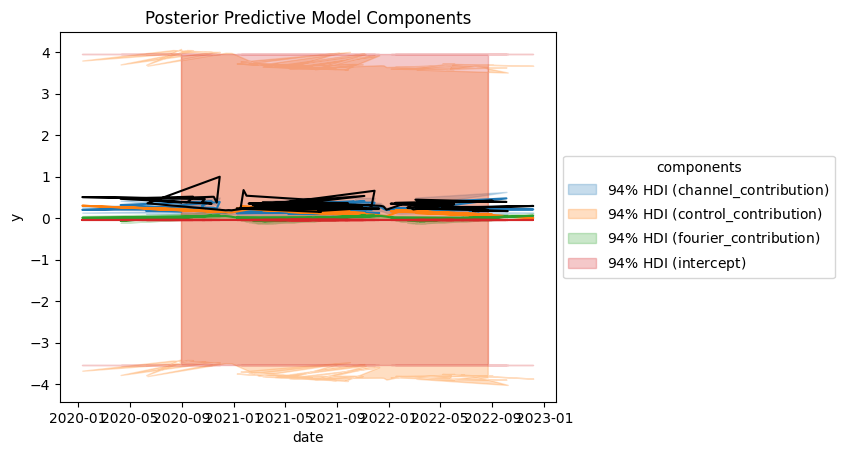

In [33]:
fig = loaded_mmm.plot_components_contributions()

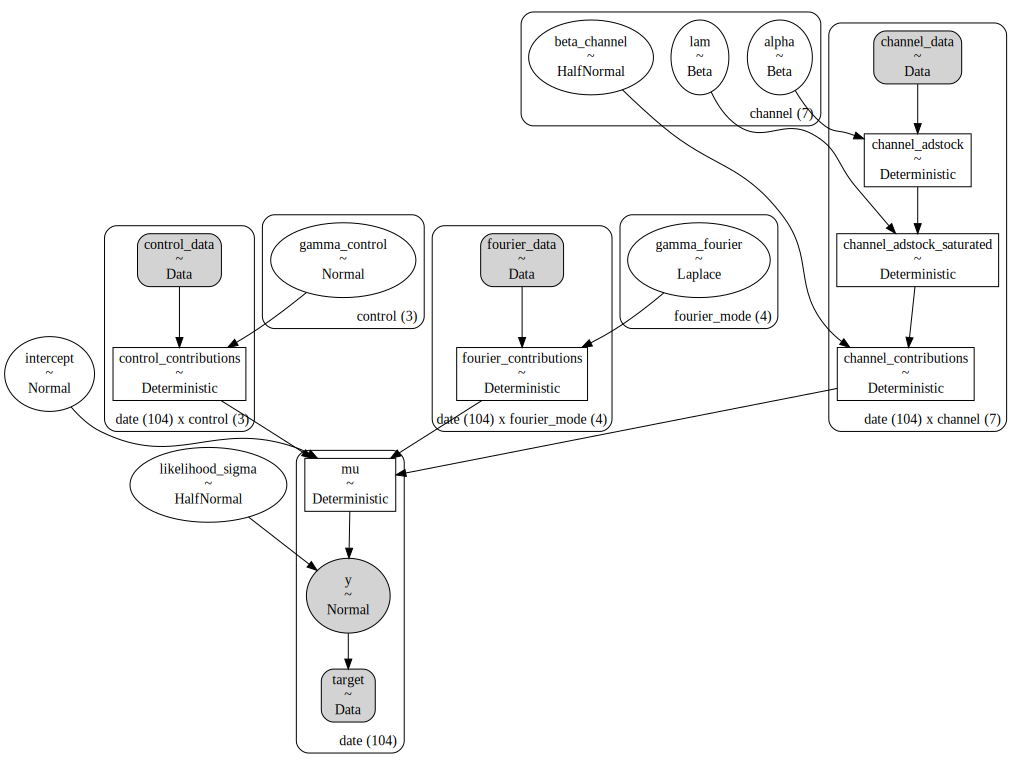

In [34]:
fig = loaded_mmm.graphviz()
fig

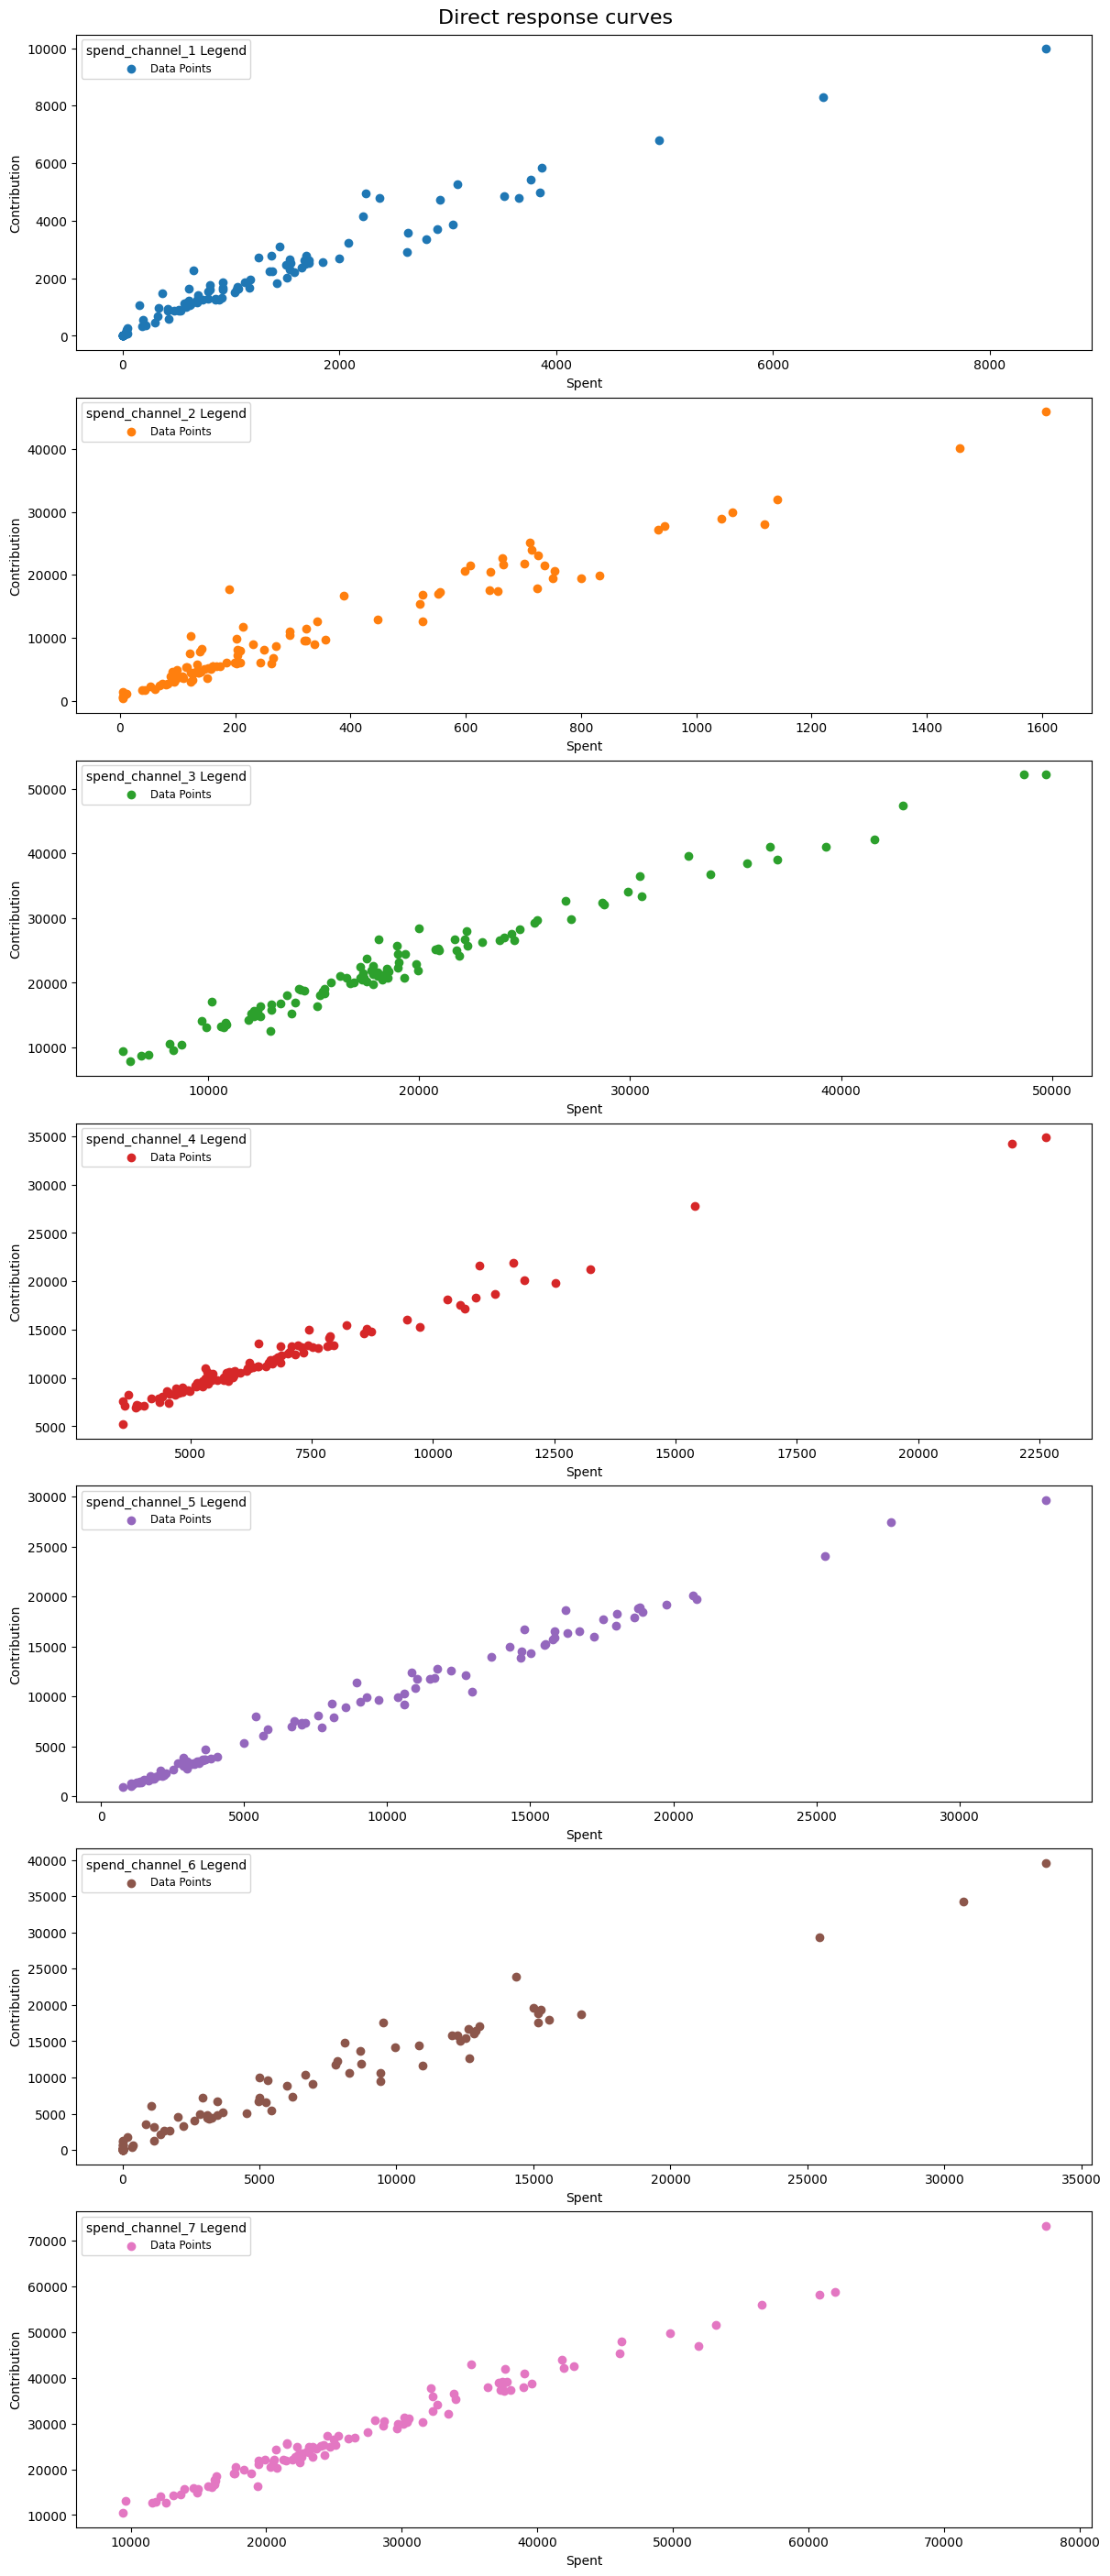

In [35]:
fig = loaded_mmm.plot_direct_contribution_curves()

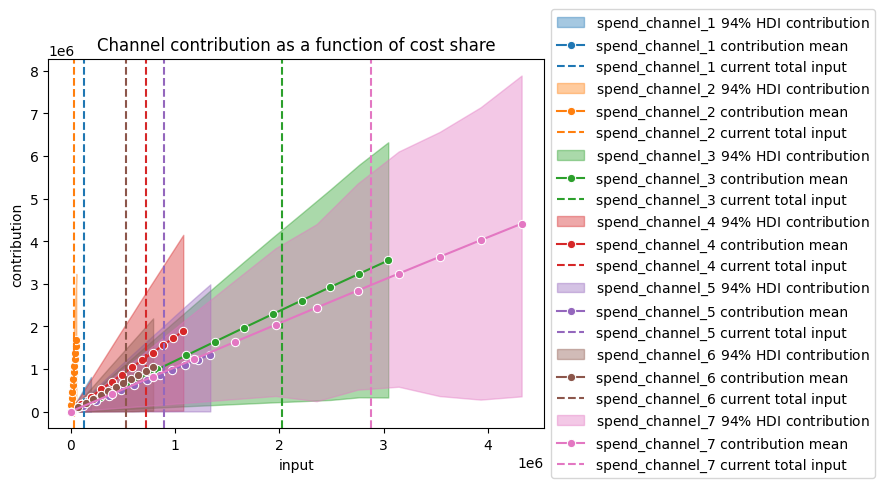

In [36]:
fig = loaded_mmm.plot_channel_contributions_grid(start = 0,stop = 1.5,num = 12, absolute_xrange= True );


In [37]:

get_mean_contributions_over_time_df = loaded_mmm.compute_mean_contributions_over_time(original_scale=True)


In [38]:
channel_contribution_original_scale = loaded_mmm.compute_channel_contribution_original_scale()

In [39]:
roas_samples = (
    channel_contribution_original_scale.stack(
        sample= ("chain","draw")).sum("date")
        / X[['spend_channel_1', 'spend_channel_2',
       'spend_channel_3', 'spend_channel_4', 'spend_channel_5',
       'spend_channel_6', 'spend_channel_7']].sum().to_numpy()[...,None]

)

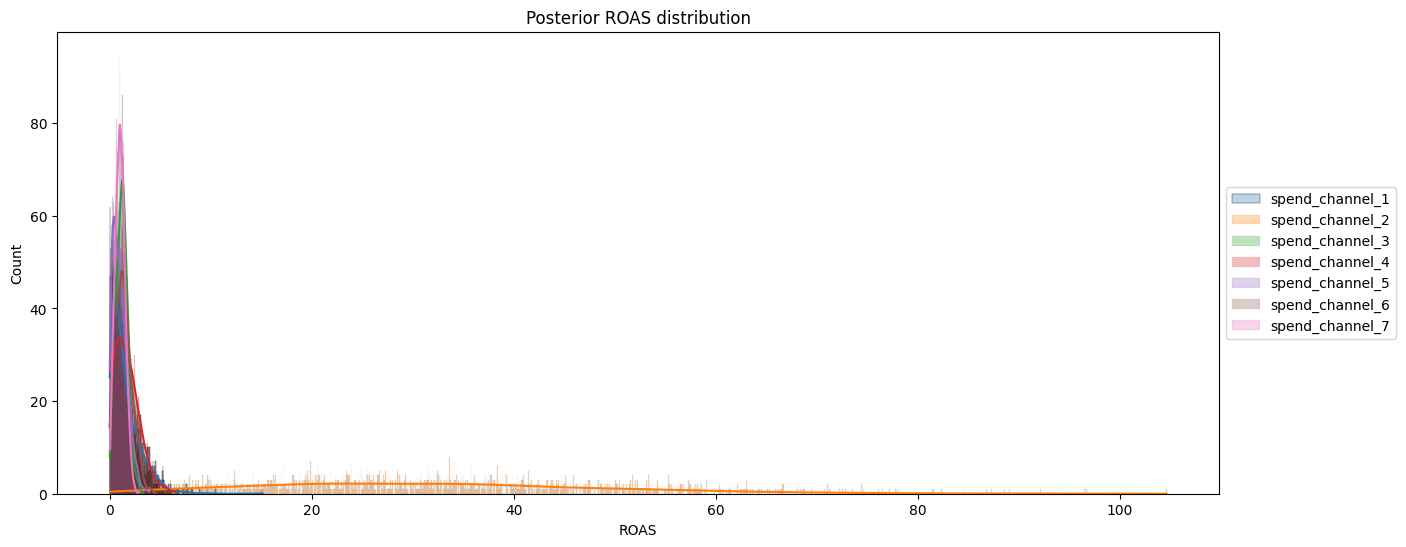

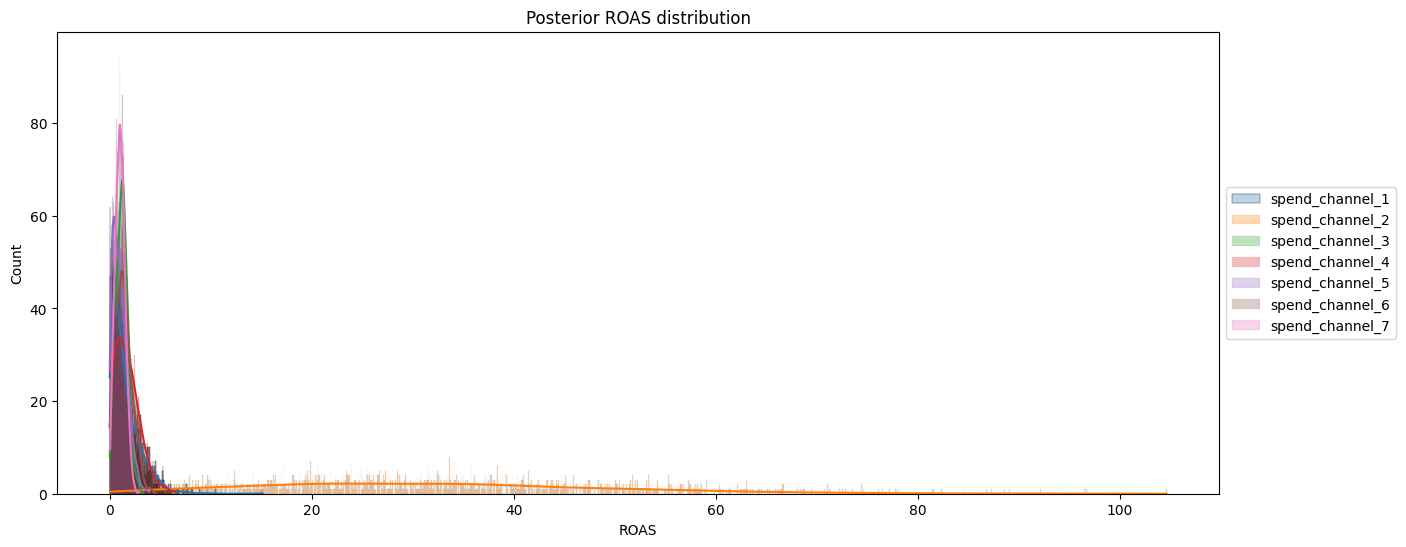

In [40]:
fig, ax = plt.subplots(figsize = (15,6))
for channel in ['spend_channel_1', 'spend_channel_2',
       'spend_channel_3', 'spend_channel_4', 'spend_channel_5',
       'spend_channel_6', 'spend_channel_7']:
       sns.histplot(
           roas_samples.sel(channel=channel).to_numpy(),
           binwidth=0.05, alpha=0.3, kde= True, ax= ax,
           legend = True, label = channel
       )
ax.legend(loc = 'center left' , bbox_to_anchor = (1,0.5))
ax.set(title = "Posterior ROAS distribution", xlabel= "ROAS")
fig

In [41]:
roas_df = roas_samples.to_dataframe(name = "roas")

In [42]:
 roas_df.groupby("channel").mean()


,chain,draw,roas
channel,,,
spend_channel_1,0.5,499.5,1.557833
spend_channel_2,0.5,499.5,31.571680
spend_channel_3,0.5,499.5,1.179861
spend_channel_4,0.5,499.5,1.762314
spend_channel_5,0.5,499.5,1.009644
spend_channel_6,0.5,499.5,1.346845
spend_channel_7,0.5,499.5,1.031686


In [43]:
roas_df.groupby("channel")["roas"].describe(percentiles = [0.025 , 0.975])

,count,mean,std,min,2.5%,50%,97.5%,max
channel,,,,,,,,
spend_channel_1,2000.0,1.557833,1.462673,0.000512,0.042742,1.113618,5.227431,15.118637
spend_channel_2,2000.0,31.571680,17.452552,0.026130,3.217020,30.315284,69.448924,104.620307
spend_channel_3,2000.0,1.179861,0.569377,0.004392,0.165108,1.183105,2.350650,3.344771
spend_channel_4,2000.0,1.762314,1.203710,0.001012,0.115305,1.567694,4.659991,6.457852
spend_channel_5,2000.0,1.009644,0.708128,0.000968,0.046347,0.891309,2.648332,3.881920
spend_channel_6,2000.0,1.346845,0.810930,0.000507,0.096843,1.272053,3.077243,4.585463
spend_channel_7,2000.0,1.031686,0.481684,0.033625,0.180292,1.014879,2.032359,2.943910


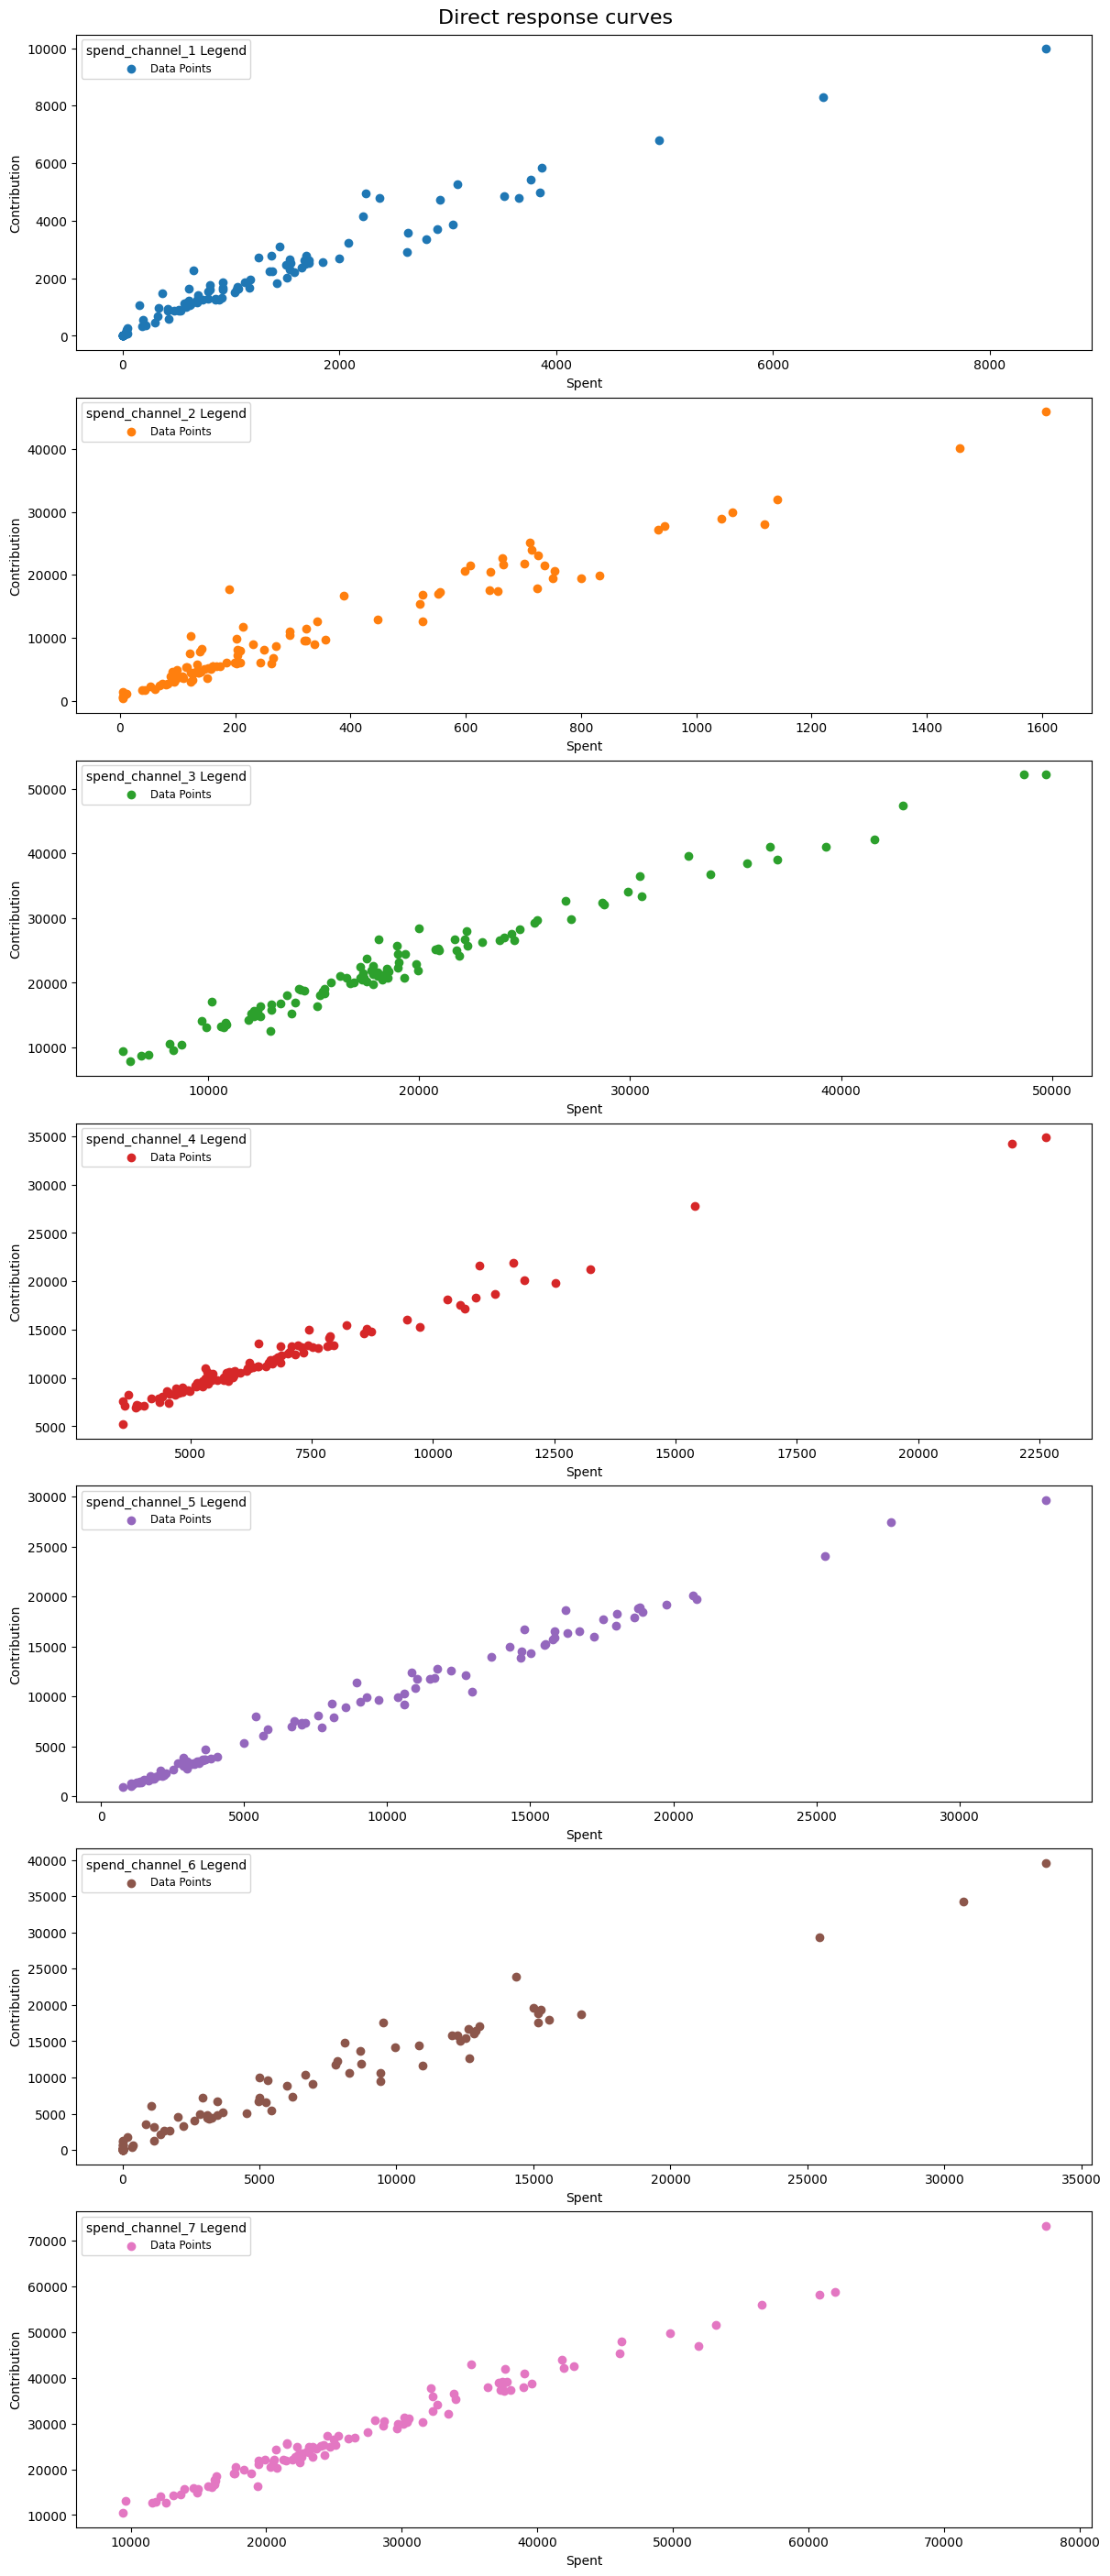

In [46]:
response_curve_fig = loaded_mmm.plot_direct_contribution_curves()

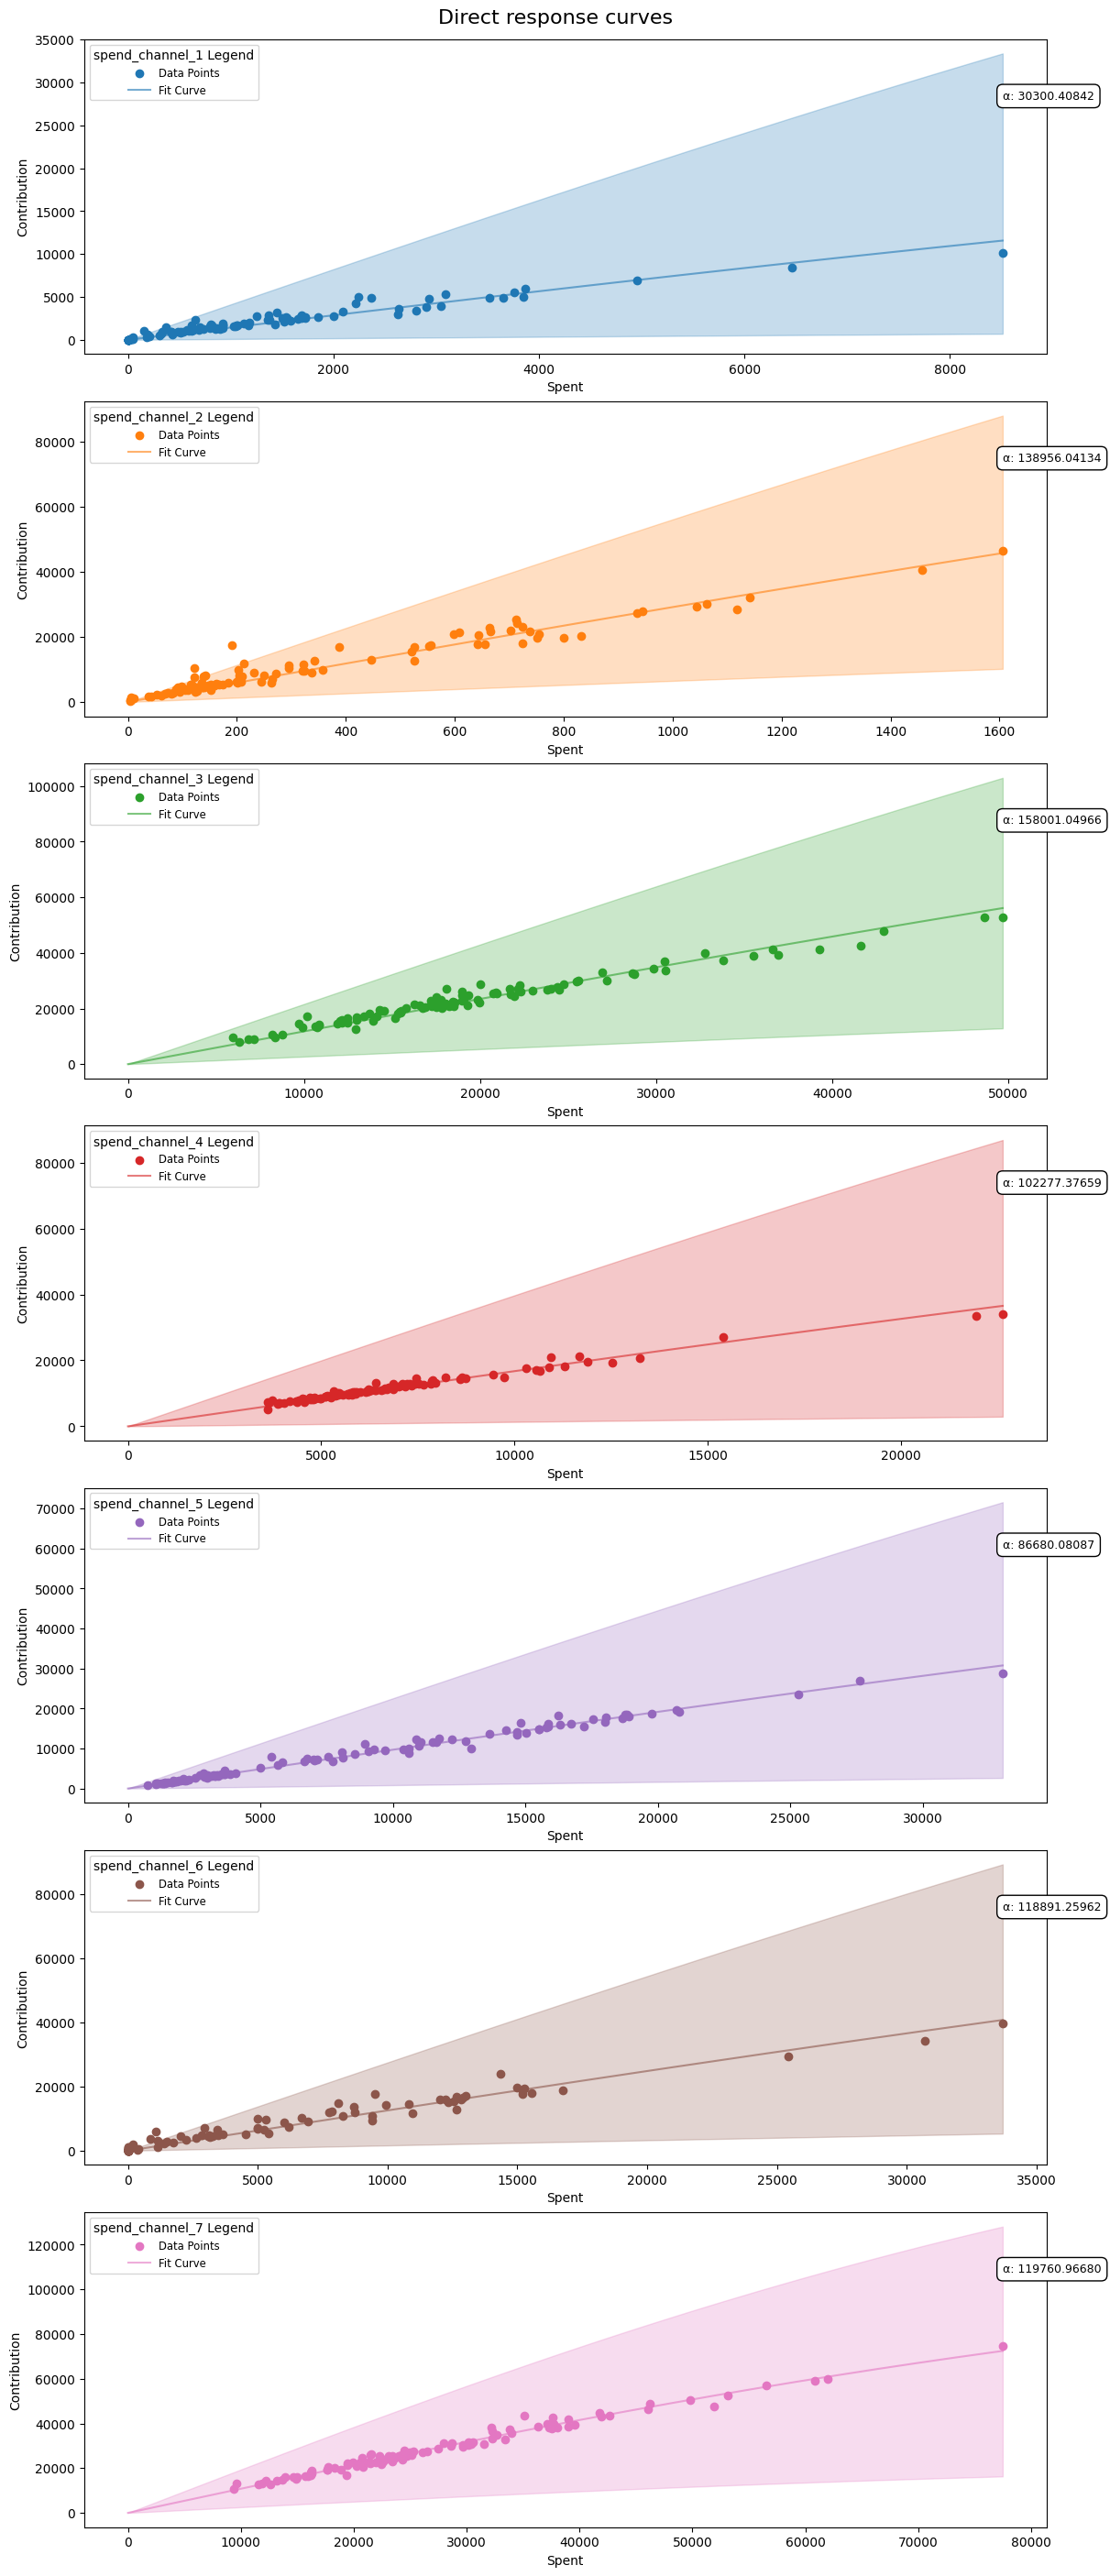

In [64]:
sigmoid_response_curve_fig = mmm.plot_direct_contribution_curves(show_fit = True)

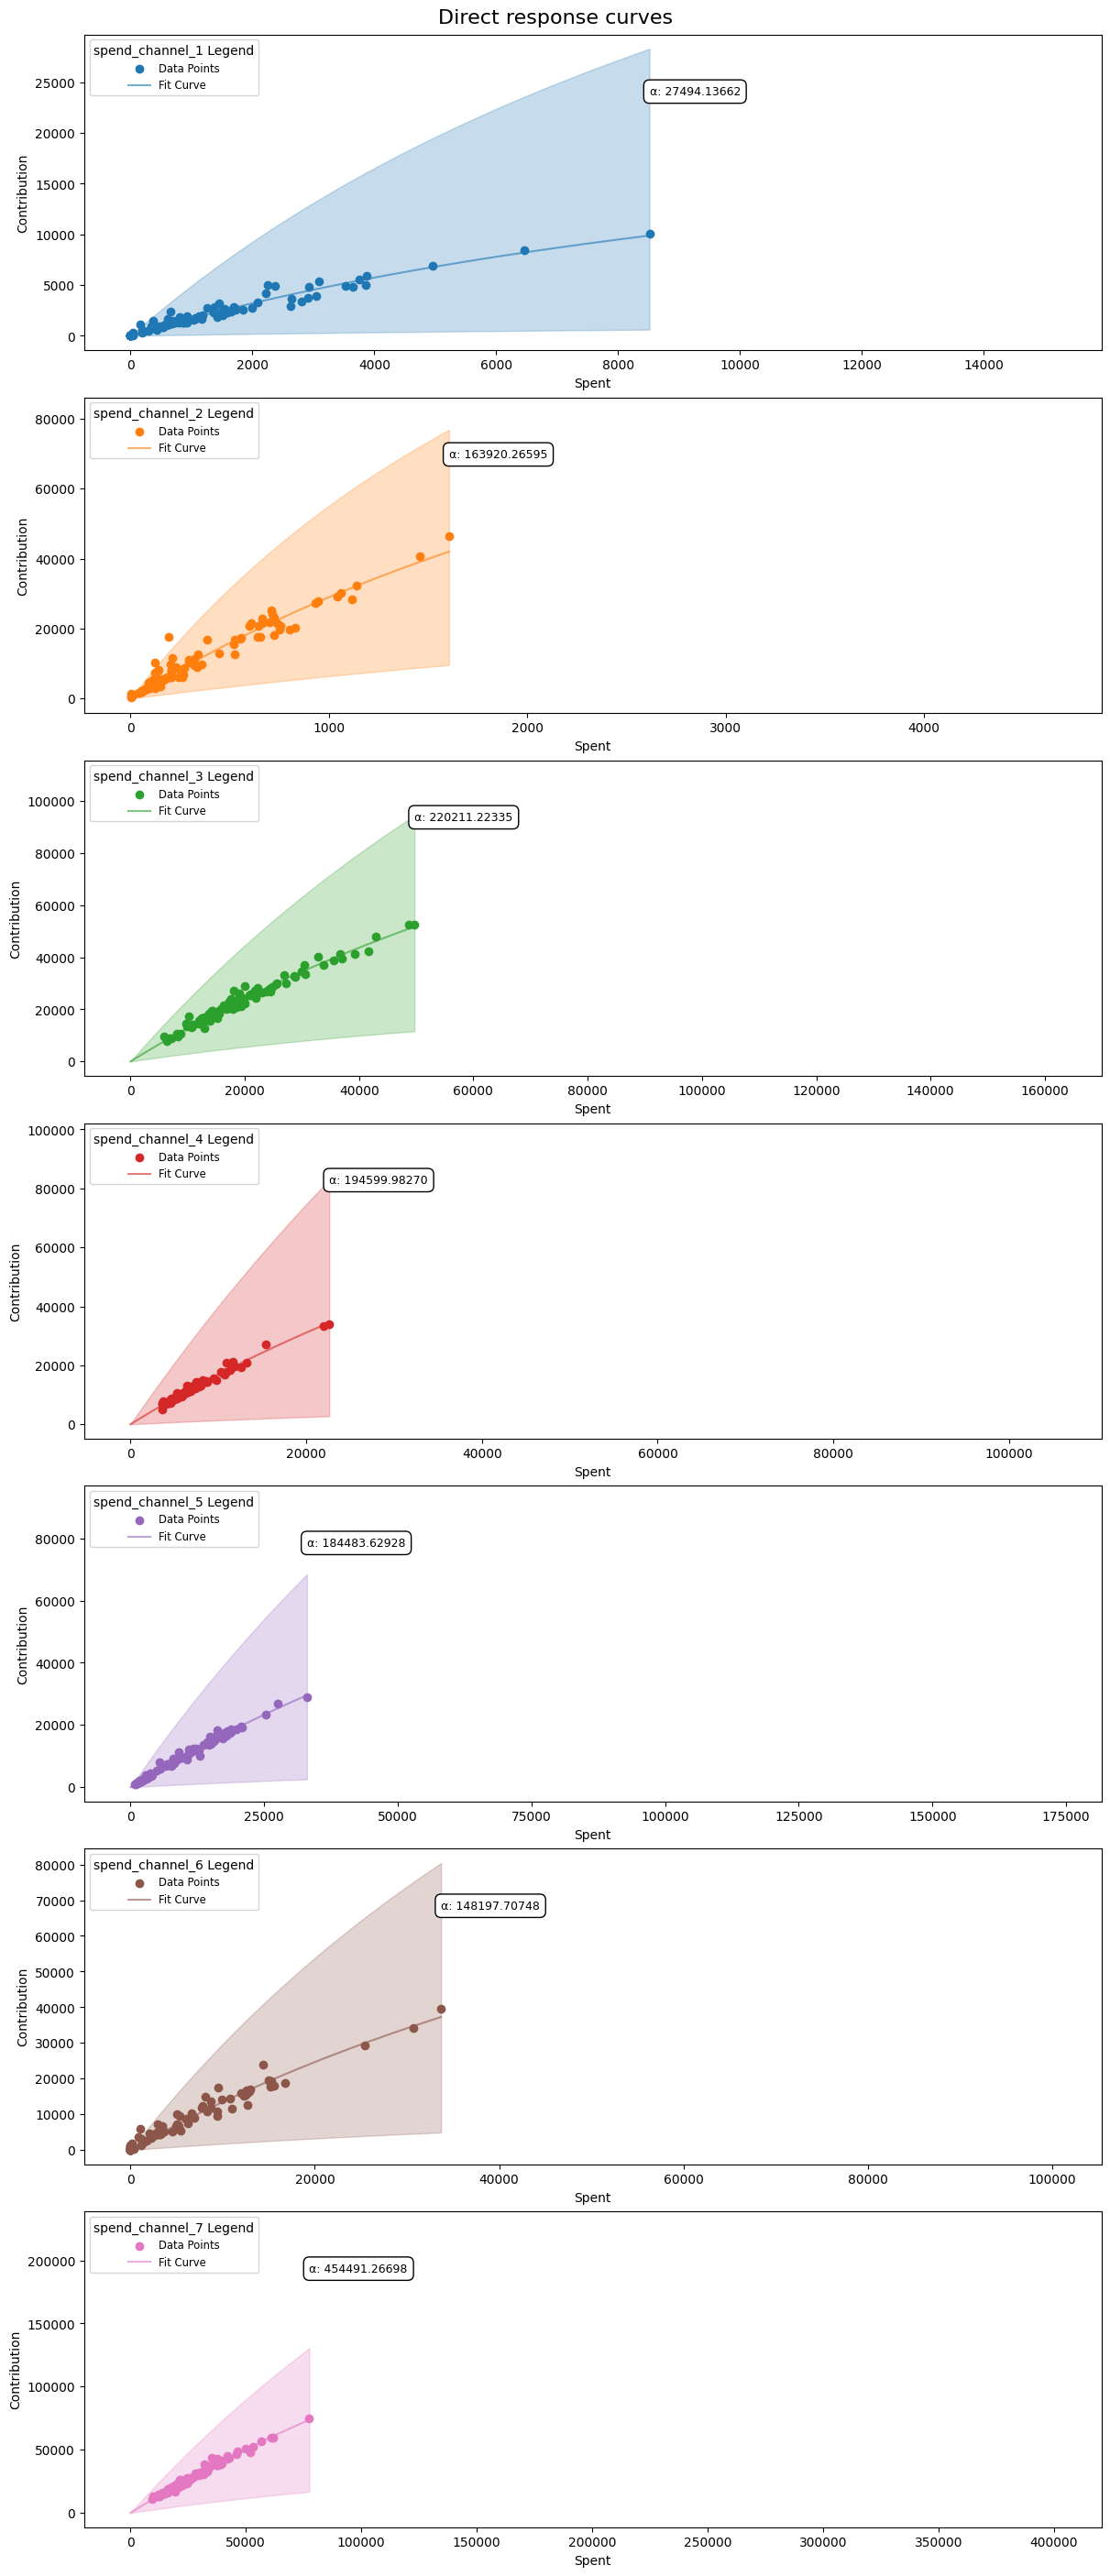

In [50]:
sigmoid_response_curve_fig = mmm.plot_direct_contribution_curves(
    show_fit = True, method = "michaelis-menten"
)

In [72]:
sigmoid_params = loaded_mmm.compute_channel_curve_optimization_parameters_original_scale(method="sigmoid")


In [73]:
sigmoid_params

{'spend_channel_1': array([2.99219485e+04, 9.41286977e-05]),
 'spend_channel_2': array([1.37683269e+05, 4.26401534e-04]),
 'spend_channel_3': array([1.56594152e+05, 1.49131003e-05]),
 'spend_channel_4': array([1.04676735e+05, 3.31137875e-05]),
 'spend_channel_5': array([8.89475803e+04, 2.24244412e-05]),
 'spend_channel_6': array([1.18647473e+05, 2.12030011e-05]),
 'spend_channel_7': array([1.16563225e+05, 1.82845935e-05])}

In [74]:
menten_params = loaded_mmm.compute_channel_curve_optimization_parameters_original_scale(method = "michaelis-menten")

In [75]:
menten_params

{'spend_channel_1': array([27552.51440909, 15506.73575545]),
 'spend_channel_2': array([158224.23267266,   4510.16010704]),
 'spend_channel_3': array([224620.5506551 , 167737.07238455]),
 'spend_channel_4': array([195793.08875936, 102960.44779966]),
 'spend_channel_5': array([193894.33627564, 178092.36291854]),
 'spend_channel_6': array([147207.13347378,  99724.64717813]),
 'spend_channel_7': array([437960.76235692, 391962.61907833])}

In [227]:
total_budget = 430000

In [228]:
channels = ['spend_channel_1', 'spend_channel_2',
       'spend_channel_3', 'spend_channel_4', 'spend_channel_5',
       'spend_channel_6', 'spend_channel_7']

In [229]:
budget_per_channel = total_budget / len(channels)

In [230]:
initial_budget_dict = {channel : budget_per_channel for channel in channels}

In [231]:
min_budget , max_budget = 0 , 100000
budget_bounds = {channel : [min_budget, max_budget] for channel in channels}

In [233]:
result_sigmoid = loaded_mmm.optimize_channel_budget_for_maximum_contribution(
    method = "sigmoid",
    total_budget = total_budget,
    parameters = signoid_params,
    budget_bounds= budget_bounds

)
result_sigmoid

,estimated_contribution,optimal_budget
spend_channel_1,22887.742044,20874.349665
spend_channel_2,137515.145128,12350.864868
spend_channel_3,100101.385902,100000.000000
spend_channel_4,81956.306956,66772.832350
spend_channel_5,53258.536495,63685.913736
spend_channel_6,84473.194585,83825.727487
spend_channel_7,75779.499302,82490.311894
total,555971.810413,430000.000000


In [234]:
result_menten = loaded_mmm.optimize_channel_budget_for_maximum_contribution(
    method = "michaelis-menten",
    total_budget = total_budget,
    parameters = menten_params,
    budget_bounds= budget_bounds

)
result_menten

,estimated_contribution,optimal_budget
spend_channel_1,11652.734930,11364.678462
spend_channel_2,138148.562259,31036.180685
spend_channel_3,72653.259391,80192.552805
spend_channel_4,86436.462063,81380.864690
spend_channel_5,52163.213942,65545.731068
spend_channel_6,55573.211407,60479.992289
spend_channel_7,89023.178870,100000.000000
total,505650.622861,430000.000000


In [235]:
budget_list = []
for total_budget in np.linspace(10000 ,1600000, 60):
  result_sigmoid = loaded_mmm.optimize_channel_budget_for_maximum_contribution(
    method = "sigmoid",
    total_budget = total_budget,
    parameters = signoid_params,
    budget_bounds= {channel : [0 , total_budget] for channel in channels}
  )
  budget_list.append(result_sigmoid.tail(1))


In [236]:
profit_df = pd.concat(budget_list , ignore_index = True) \
      .assign(channel_profit = lambda x : x["estimated_contribution"] - x["optimal_budget"])

profit_df

,estimated_contribution,optimal_budget,channel_profit
0,135074.093780,1.000000e+04,125074.093780
1,177852.854587,3.694915e+04,140903.702045
2,213058.343928,6.389831e+04,149160.038843
3,245329.936571,9.084746e+04,154482.478943
4,275879.804960,1.177966e+05,158083.194790
5,306319.351854,1.447458e+05,161573.589142
6,334562.628080,1.716949e+05,162867.712826
7,363105.135734,1.986441e+05,164461.067938
8,389596.013440,2.255932e+05,164002.793101
9,415392.331980,2.525424e+05,162849.959098


[Text(0.5, 1.0, 'channel Profile vs Optimal Budget'),
 Text(0.5, 0, 'Optimal Budget'),
 Text(0, 0.5, 'Channel Profit')]

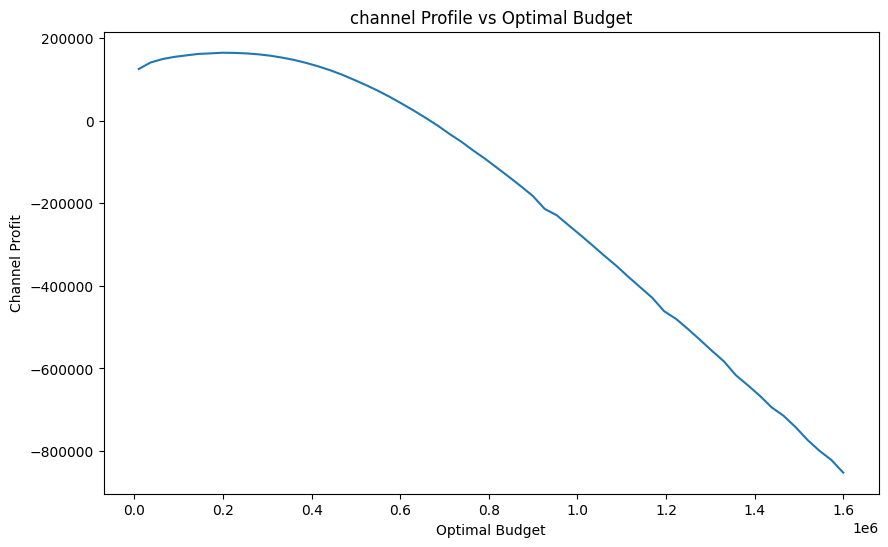

In [237]:
fig , ax = plt.subplots(figsize = (10,6))
sns.lineplot(data =profit_df, x ="optimal_budget", y = "channel_profit", ax = ax)
ax.set(title = "channel Profile vs Optimal Budget", xlabel = "Optimal Budget", ylabel= "Channel Profit")

In [216]:
profit_df.query("((channel_profit - optimal_budget) / channel_profit) >= 0")

,estimated_contribution,optimal_budget,channel_profit
0,135074.093780,1.000000e+04,125074.093780
1,177852.854587,3.694915e+04,140903.702045
2,213058.343928,6.389831e+04,149160.038843
3,245329.936571,9.084746e+04,154482.478943
4,275879.804960,1.177966e+05,158083.194790
5,306319.351854,1.447458e+05,161573.589142
25,672422.411706,6.837288e+05,-11306.401853
26,678898.544031,7.106780e+05,-31779.422071
27,686969.436053,7.376271e+05,-50657.682591
28,692496.632576,7.645763e+05,-72079.638610


In [238]:
optimal_budget = 1.447458e+05

In [239]:
channel_profit = 161573.589142

In [240]:
profit_df.query("channel_profit == channel_profit.max()")


,estimated_contribution,optimal_budget,channel_profit
7,363105.135734,198644.067797,164461.067938


In [241]:
total_budget = 1.447458e+05

In [242]:
data.columns

Index(['start_of_week', 'revenue', 'spend_channel_1', 'spend_channel_2',
       'spend_channel_3', 'spend_channel_4', 'spend_channel_5',
       'spend_channel_6', 'spend_channel_7'],
      dtype='object')

In [243]:
channels = ['spend_channel_1', 'spend_channel_2',
       'spend_channel_3', 'spend_channel_4', 'spend_channel_5',
       'spend_channel_6', 'spend_channel_7']

In [244]:
budget_per_channel = total_budget /len(channels)

In [245]:
initial_budget_dict = {channel: budget_per_channel for channel in channels}

In [246]:
min_budget , max_budget = 0,1.447458e+05
budget_bounds = {channel : [min_budget, max_budget]for channel in channels}

In [247]:
result_sigmoid = loaded_mmm.optimize_channel_budget_for_maximum_contribution(
    method = "sigmoid",
    total_budget = total_budget,
    parameters = signoid_params,
    budget_bounds= budget_bounds

)

In [248]:
optimal_budget = result_sigmoid \
          .assign(chaneel_profit = lambda x : x["estimated_contribution"] - x["optimal_budget"]) \
          .apply(lambda x: x.apply(lambda y: "{:,.0f}".format(y)))



In [249]:
optimal_budget

,estimated_contribution,optimal_budget,chaneel_profit
spend_channel_1,"14,620","11,149","3,471"
spend_channel_2,"136,438","11,030","125,408"
spend_channel_3,"40,216","34,825","5,392"
spend_channel_4,"58,026","38,987","19,039"
spend_channel_5,0,0,-0
spend_channel_6,"44,151","36,807","7,345"
spend_channel_7,"12,891","11,948",942
total,"306,343","144,746","161,597"


In [250]:
mean_spend

spend_channel_1     1245.604808
spend_channel_2      343.640962
spend_channel_3    19507.177981
spend_channel_4     6915.136731
spend_channel_5     8575.611442
spend_channel_6     5063.699038
spend_channel_7    27701.367404
dtype: float64


##Estimate $161,597 profit per week at $144,746

In [252]:
144746 * 4  # monthly profit

578984

In [253]:
578984 * 12 # yearly profit

6947808

In [260]:
return_after_optimization = 306343 / 144746  #total return after optimization

In [261]:
return_before_optimization = total_revenue / total_spend  # initial return

In [263]:
return_after_optimization - return_before_optimization  # improvement

0.14834583718403804